# Doppler setup

This example shows how to use PyAEDT to create a multipart scenario in HFSS SBR+
and set up a doppler analysis.

Keywords: **HFSS**, **SBR+**, **doppler**.

## Perform imports and define constants

Perform required imports.

In [1]:
import os
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.examples.downloads import download_multiparts
from ansys.aedt.core.examples.downloads import download_file
from ansys.aedt.core.examples.downloads import unzip

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Download 3D component
Download the 3D component that is needed to run the example.

In [4]:
library_path = download_multiparts(
    local_path=temp_folder.name
)

C:\Users\ansys\AppData\Local\Temp\tmprf7buwsh.ansys\multiparts


In [5]:
zip_file = download_file(
    "frtm",
    name="doppler_sbr.results.zip",
    local_path=temp_folder.name
)

In [6]:
results = os.path.join(temp_folder.name, "doppler_sbr.results")

In [7]:
unzip(zip_file, results)

C:\Users\ansys\AppData\Local\Temp\tmprf7buwsh.ansys\doppler_sbr.results


## Launch HFSS and open project

Launch HFSS and open the project.

In [8]:
project_name = os.path.join(temp_folder.name, "doppler.aedt")
app = ansys.aedt.core.Hfss(
    version=AEDT_VERSION,
    solution_type="SBR+",
    new_desktop=True,
    project=project_name,
    close_on_exit=True,
    non_graphical=NG_MODE,
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_aef76f9a-3356-4c30-b4ac-3c703f8bf4d8.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 4576.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Project doppler has been created.


PyAEDT INFO: No design is present. Inserting a new design.


PyAEDT INFO: Added design 'HFSS_C74' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


Creation of the "actors" in the scene is comprised of many editing steps. Disabling the autosave option helps
avoid delays that occur while the project is being saved.

In [9]:
app.autosave_disable()

True

## Save project and rename design

Save the project to the temporary folder and rename the design.

In [10]:
design = "doppler_sbr"
app.rename_design(design)
app.save_project()

PyAEDT INFO: Project doppler Saved correctly


True

## Set up library paths

Specify the location of 3D components used to create the scene.

In [11]:
actor_lib = os.path.join(library_path, "actor_library")
env_lib = os.path.join(library_path, "environment_library")
radar_lib = os.path.join(library_path, "radar_modules")
env_folder = os.path.join(env_lib, "road1")
person_folder = os.path.join(actor_lib, "person3")
car_folder = os.path.join(actor_lib, "vehicle1")
bike_folder = os.path.join(actor_lib, "bike1")
bird_folder = os.path.join(actor_lib, "bird1")

## Define environment

Define the background environment.

In [12]:
road1 = app.modeler.add_environment(input_dir=env_folder, name="Bari")
prim = app.modeler

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmprf7buwsh.ansys\doppler.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmprf7buwsh.ansys\doppler.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.01603984832763672


## Place actors

Place actors in the environment. This code places persons, birds, bikes, and cars
in the environment.

In [13]:
person1 = app.modeler.add_person(
    input_dir=person_folder,
    speed=1.0,
    global_offset=[25, 1.5, 0],
    yaw=180,
    name="Massimo",
)
person2 = app.modeler.add_person(
    input_dir=person_folder,
    speed=1.0,
    global_offset=[25, 2.5, 0],
    yaw=180,
    name="Devin",
)
car1 = app.modeler.add_vehicle(
    input_dir=car_folder, speed=8.7, global_offset=[3, -2.5, 0], name="LuxuryCar"
)
bike1 = app.modeler.add_vehicle(
    input_dir=bike_folder,
    speed=2.1,
    global_offset=[24, 3.6, 0],
    yaw=180,
    name="Alberto_in_bike",
)
bird1 = app.modeler.add_bird(
    input_dir=bird_folder,
    speed=1.0,
    global_offset=[19, 4, 3],
    yaw=120,
    pitch=-5,
    flapping_rate=30,
    name="Pigeon",
)
bird2 = app.modeler.add_bird(
    input_dir=bird_folder,
    speed=1.0,
    global_offset=[6, 2, 3],
    yaw=-60,
    pitch=10,
    name="Eagle",
)

PyAEDT INFO: Adding person: Massimo_0


PyAEDT INFO: Adding person: Devin_1


PyAEDT INFO: Adding vehicle: LuxuryCar_0


PyAEDT INFO: Adding vehicle: Alberto_in_bike_0


PyAEDT INFO: Adding Vehicle: Pigeon_0


PyAEDT INFO: Adding Vehicle: Eagle_1


## Place radar

Place radar on the car. The radar is created relative to the car's coordinate
system.

In [14]:
radar1 = app.create_sbr_radar_from_json(
    radar_file=radar_lib,
    name="Example_1Tx_1Rx",
    offset=[2.57, 0, 0.54],
    use_relative_cs=True,
    relative_cs_name=car1.cs_name,
)

PyAEDT INFO: Adding radar module:  Example_1Tx_1Rx_0


PyAEDT INFO: Native component Parametric Beam Example_1Tx_1Rx_0_tx1 has been correctly created.


PyAEDT INFO: Native component Parametric Beam Example_1Tx_1Rx_0_rx1 has been correctly created.


PyAEDT INFO: Boundary SBRTxRxSettings SBRTxRxSettings has been created.


PyAEDT INFO: Group Created:  Example_1Tx_1Rx_0


## Create setup

Create setup and validate it. The ``create_sbr_pulse_doppler_setup()`` method
creates a setup and a parametric sweep on the time variable with a
duration of two seconds. The step is computed automatically from CPI.

In [15]:
setup, sweep = app.create_sbr_pulse_doppler_setup(sweep_time_duration=2, velocity_resolution=0.05)
app.set_sbr_current_sources_options()
app.validate_simple()

PyAEDT WARNING: Field Observation Domain not defined


PyAEDT INFO: SBR+ current source options correctly applied.


True

## Solve and release AEDT

Solve and release AEDT. To solve, uncomment the ``app.analyze_setup`` command
to activate the simulation.

In [16]:
# app.analyze_setup(sweep.name)

## Doppler post-processing

Once the design is solved, you can get the raw data inside the .aedtresults directory. The format of this data is
called FRTM.
PyAEDT offers sophisticated tools for FRTM post-processing
[FRTM](https://aedt.docs.pyansys.com/version/stable/API/visualization/advanced.html#frtm-processing/)

In [17]:
from ansys.aedt.core.visualization.advanced.frtm_visualization import get_results_files
from ansys.aedt.core.visualization.advanced.frtm_visualization import FRTMPlotter
from ansys.aedt.core.visualization.advanced.frtm_visualization import FRTMData

## Load FRTM files

You can load all the FRTM files inside a directory or you could load one single file.

In [18]:
doppler_data_frames = {}
frames_dict = get_results_files(results)

In [19]:
for frame, data_frame in frames_dict.items():
    doppler_data = FRTMData(data_frame)
    doppler_data_frames[frame] = doppler_data

## FRTM plotter

You can perform multiple post-processing operations like range-doppler or direction of arrival.

Class: ansys.aedt.core.visualization.plot.matplotlib.ReportPlotter

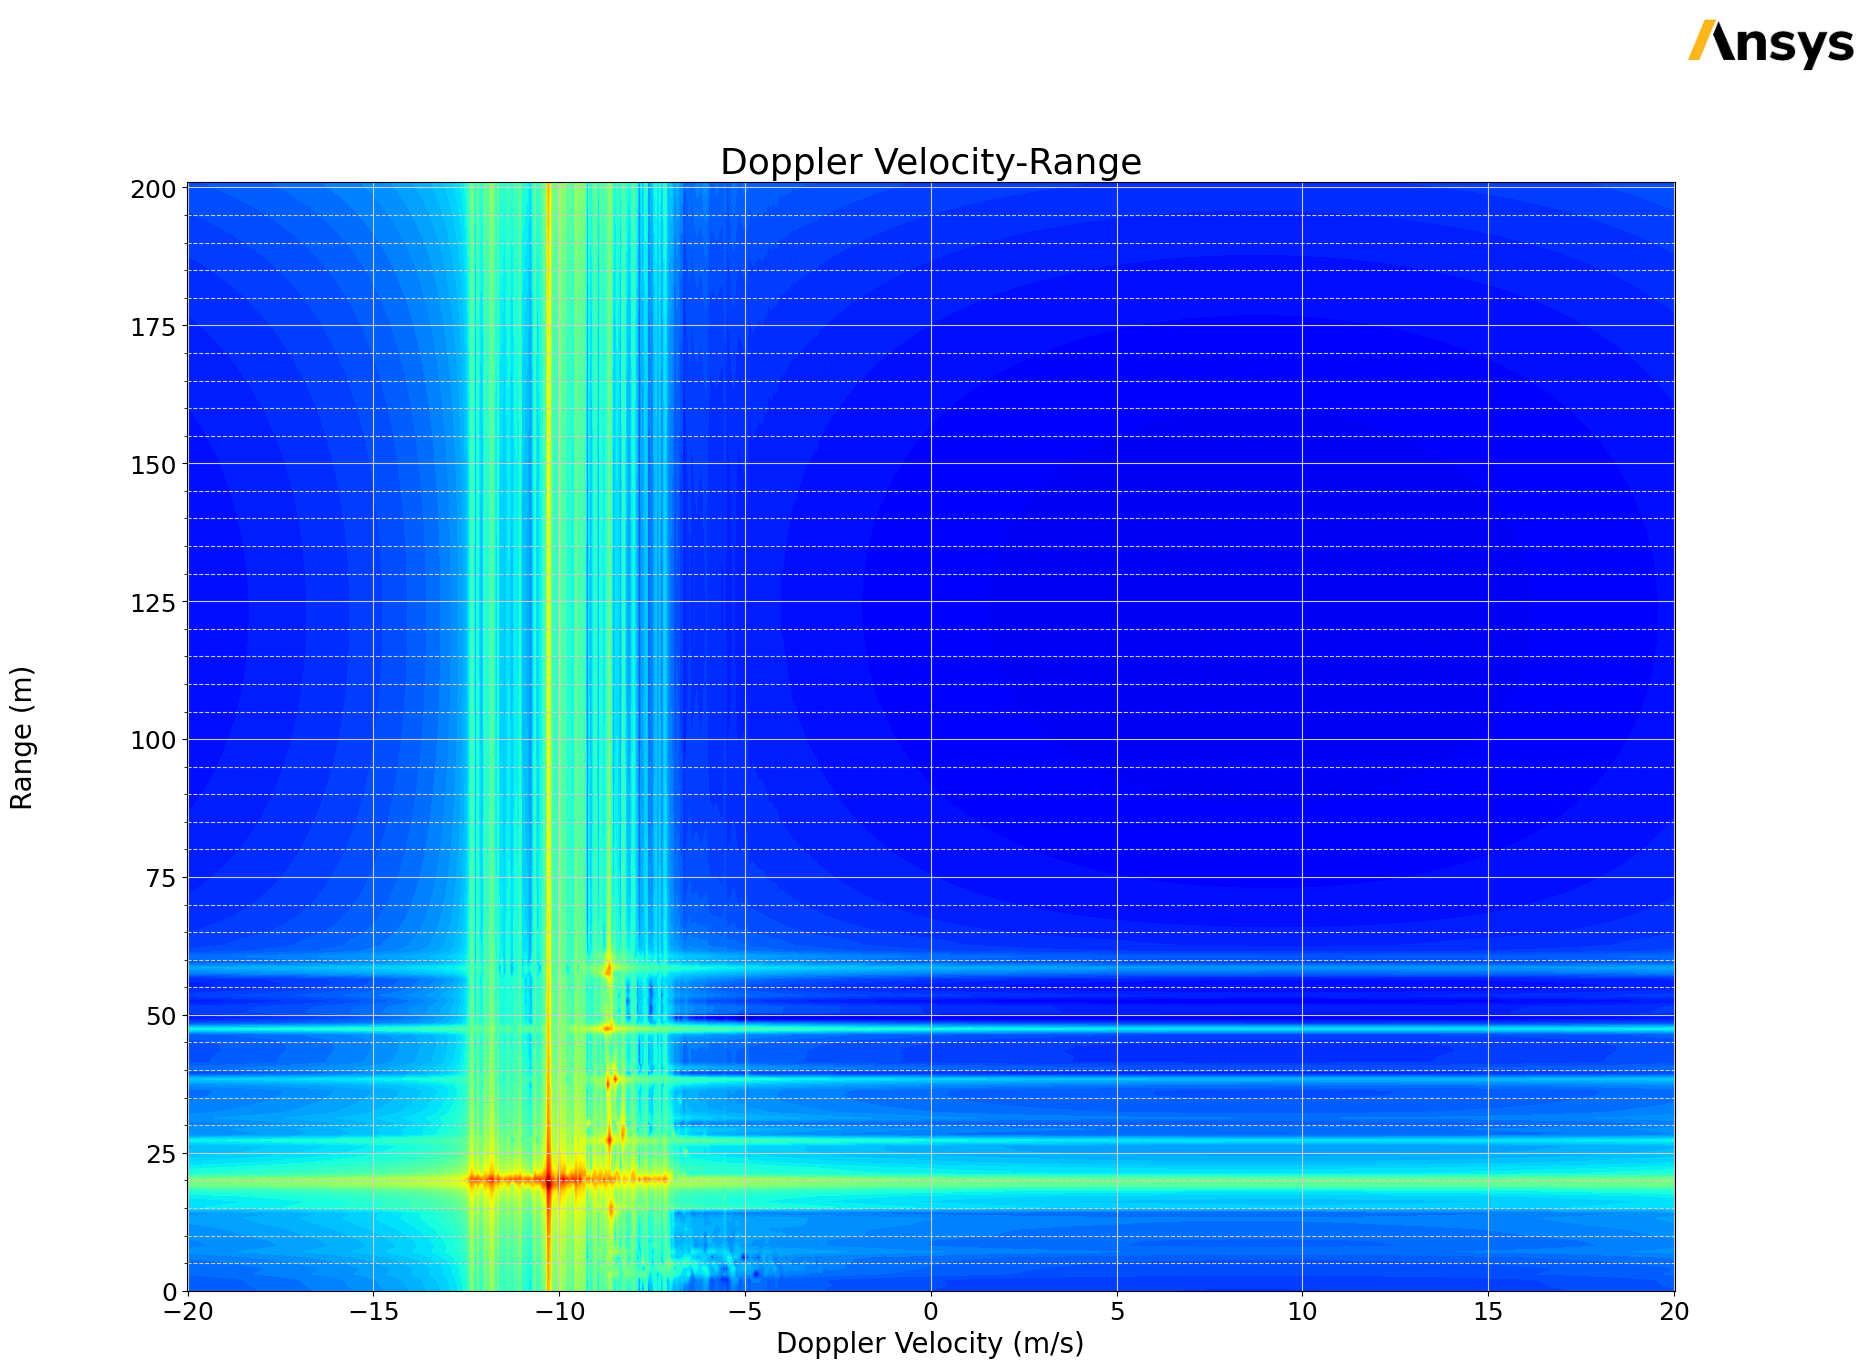

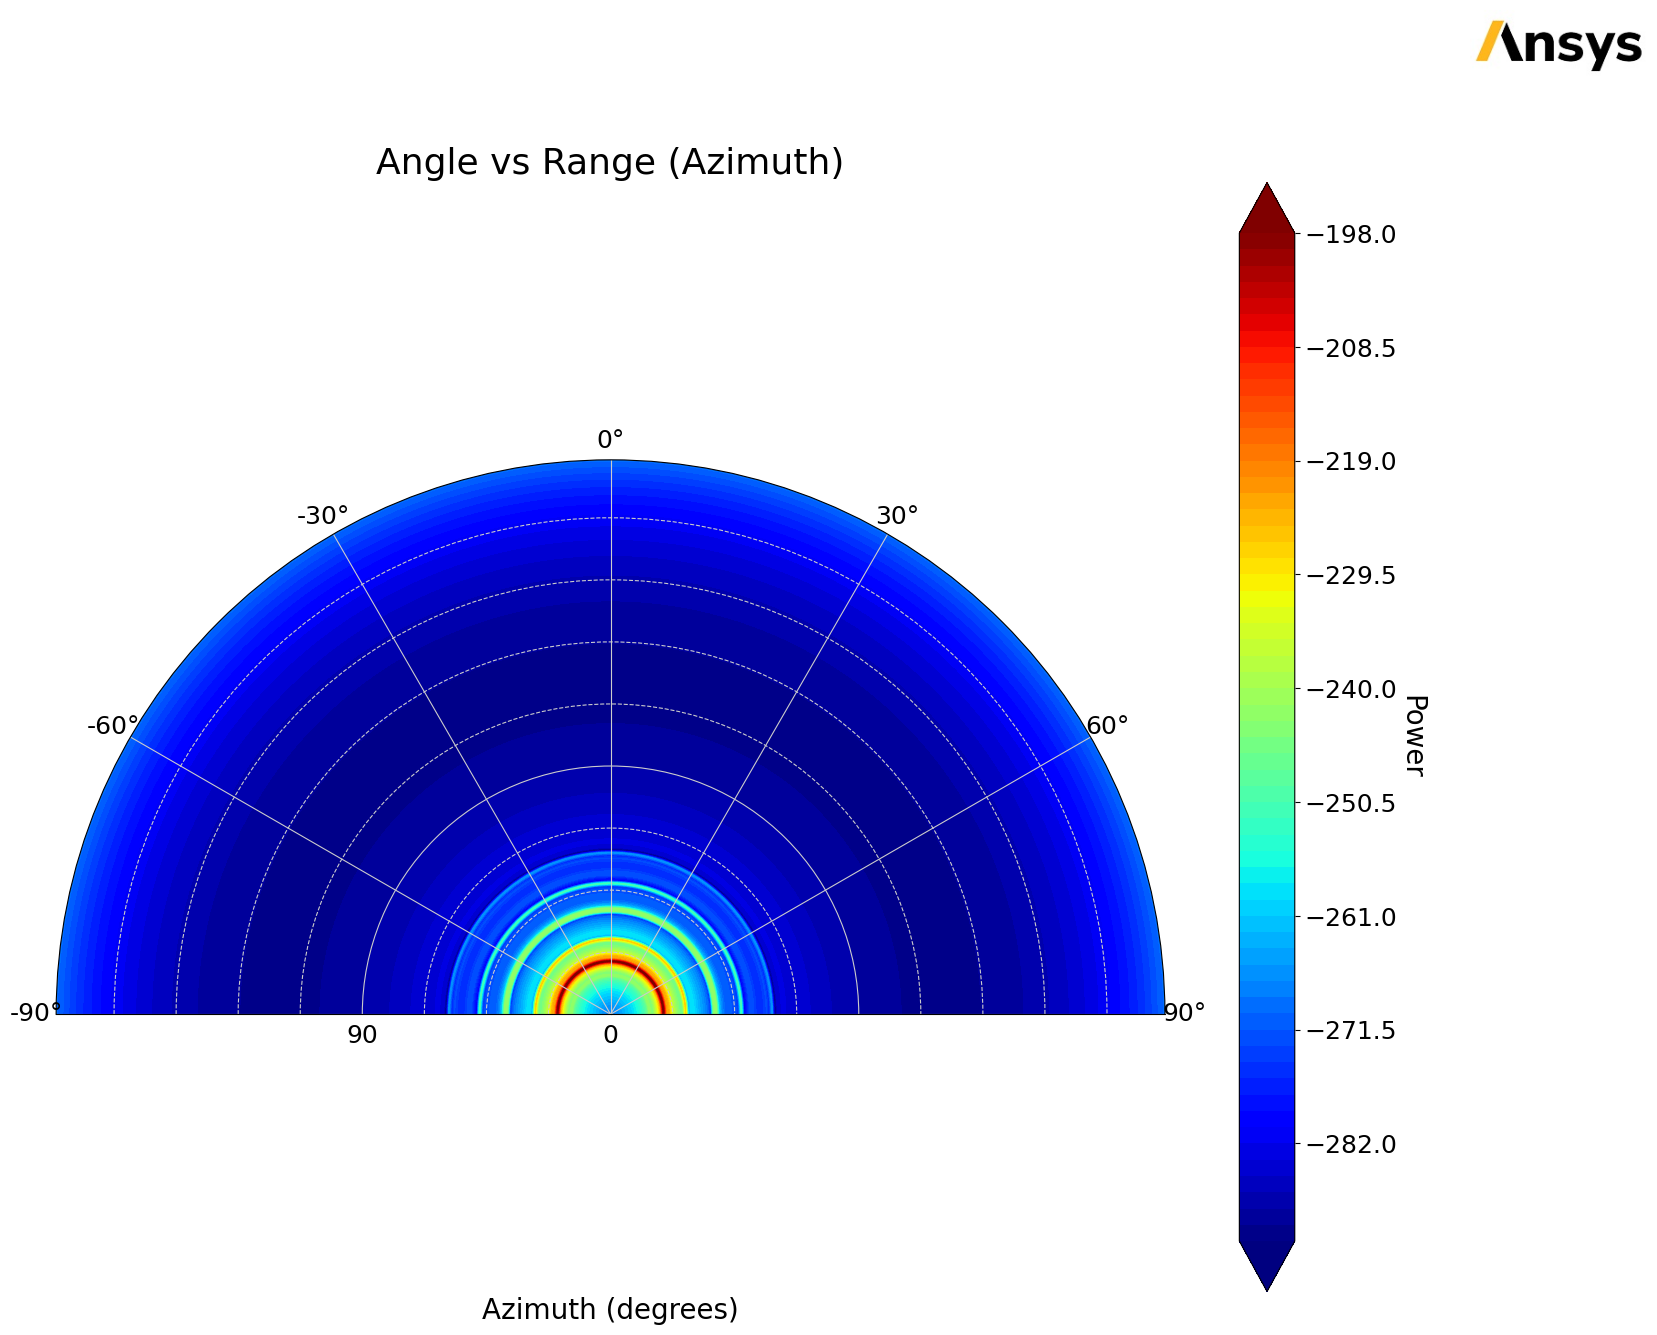

In [20]:
frtm_plotter = FRTMPlotter(doppler_data_frames)
frame_number = frtm_plotter.frames[0]
frtm_plotter.plot_range_doppler(frame=frame_number)
frtm_plotter.plot_range_angle_map(frame=frame_number, polar=True)

## Release AEDT

Release AEDT and close the example.

In [21]:
app.save_project()
app.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project doppler Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``. If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes all temporary files, including the project folder.

In [22]:
temp_folder.cleanup()